My first exploration in 2016 on tensorflow to understand how it works, and how a GradientDescentOptimizer can be modelled on them!

In [4]:
import tensorflow as tf

In [5]:
sess=tf.InteractiveSession()

/Users/stavyabhatia/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [24]:
my_tensor=tf.random_uniform(shape=[4,4])

In [25]:
my_var=tf.Variable(my_tensor)

In [26]:
init=tf.global_variables_initializer()

In [27]:
sess.run(init)

In [71]:
sess.run(my_tensor)

array([[0.33180392, 0.77573717, 0.8029789 , 0.16627085],
       [0.2900126 , 0.5469463 , 0.6286249 , 0.3406422 ],
       [0.3266275 , 0.33126652, 0.24991524, 0.10892725],
       [0.1503228 , 0.95796645, 0.4273318 , 0.899531  ]], dtype=float32)

In [72]:
import numpy as np

In [75]:
tf.set_random_seed(1)
np.random.seed(1)

In [76]:
rand_a=np.random.uniform(0,10,(5,5))

In [77]:
rand_a

array([[4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
        1.46755891e+00],
       [9.23385948e-01, 1.86260211e+00, 3.45560727e+00, 3.96767474e+00,
        5.38816734e+00],
       [4.19194514e+00, 6.85219500e+00, 2.04452250e+00, 8.78117436e+00,
        2.73875932e-01],
       [6.70467510e+00, 4.17304802e+00, 5.58689828e+00, 1.40386939e+00,
        1.98101489e+00],
       [8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
        8.76389152e+00]])

In [78]:
rand_b=np.random.uniform(0,10,(5,1))
rand_b

array([[8.94606664],
       [0.85044211],
       [0.39054783],
       [1.6983042 ],
       [8.78142503]])

In [230]:
a=tf.placeholder(tf.float32)

In [231]:
b=tf.placeholder(tf.float32)

In [232]:
add=tf.add(a,b)

In [233]:
mult=tf.multiply(a,b)

In [234]:
init=tf.global_variables_initializer()

In [235]:
with tf.Session() as sess:
    sess.run(init)
    addition=sess.run(add, feed_dict={a:rand_a,b:rand_b})
    multiplication=sess.run(mult, feed_dict={a:rand_a,b:rand_b})
    
    print("Add: ",addition)
    print('\n')
    print("Multiply: ",multiplication)

Add:  [[13.116287   16.149311    8.94721    11.969393   10.413626  ]
 [ 1.773828    2.7130442   4.3060493   4.8181167   6.2386093 ]
 [ 4.582493    7.2427425   2.4350703   9.171722    0.66442376]
 [ 8.402979    5.871352    7.2852025   3.1021736   3.679319  ]
 [16.788872   18.464043   11.915668   15.704652   17.545317  ]]


Multiply:  [[3.7307068e+01 6.4440712e+01 1.0232047e-02 2.7046873e+01 1.3128880e+01]
 [7.8528625e-01 1.5840353e+00 2.9387939e+00 3.3742776e+00 4.5823245e+00]
 [1.6371551e+00 2.6761098e+00 7.9848385e-01 3.4294689e+00 1.0696165e-01]
 [1.1386578e+01 7.0871048e+00 9.4882526e+00 2.3841972e+00 3.3643658e+00]
 [7.0316788e+01 8.5027176e+01 2.7523111e+01 6.0795795e+01 7.6959457e+01]]


In [236]:
x=np.linspace(0,10,10)+np.random.uniform(-1,1,10)
y=np.linspace(0,10,10)+np.random.uniform(-1,1,10)

In [237]:
x=x.reshape(-1,1)

In [238]:
y=y.reshape(-1,1)

In [239]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [240]:
feed_x=tf.placeholder(dtype=tf.float32,shape=[None,1])
feed_y=tf.placeholder(dtype=tf.float32,shape=[None,1])

In [241]:
W=tf.Variable(tf.random_normal(shape=[1,1]),dtype=tf.float32)
b=tf.Variable(tf.random_normal(shape=[1,1]),dtype=tf.float32)

In [242]:
y_pred=(tf.add(tf.matmul(feed_x,W),b))

In [243]:
error=tf.reduce_sum((y_pred-feed_y)**2)

In [244]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
#train=optimizer.minimize(error)

In [245]:
train=optimizer.minimize(error)

In [246]:
init=tf.global_variables_initializer()

In [247]:
with tf.Session() as sess:
    sess.run(init)
    training_steps=100
    
    for i in range(training_steps):
        sess.run(train, feed_dict={feed_x:x,feed_y:y})
    final_slope,final_intercept=sess.run([W,b])

In [248]:
error

<tf.Tensor 'Sum_1:0' shape=() dtype=float32>

In [249]:
final_slope

array([[1.0371333]], dtype=float32)

In [250]:
final_intercept

array([[-0.34629324]], dtype=float32)

In [251]:
y_pred=final_slope*x+final_intercept

In [252]:
y

array([[ 0.80680383],
       [ 0.38606052],
       [ 1.50077492],
       [ 3.94811591],
       [ 4.23979812],
       [ 4.88626395],
       [ 7.52168383],
       [ 7.4733095 ],
       [ 9.3905131 ],
       [10.45199597]])

In [253]:
y_pred

array([[-1.17115768],
       [ 0.62780633],
       [ 2.36168527],
       [ 2.9328028 ],
       [ 3.32967171],
       [ 5.49001734],
       [ 6.90768277],
       [ 7.75118336],
       [ 9.79487783],
       [10.20457836]])

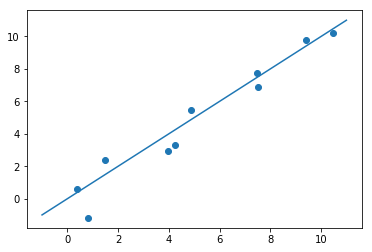

In [254]:
plt.scatter(y,y_pred)
plt.plot(range(-1,12),range(-1,12))